# Theorie

g = GM/r<sup>2</sup>

Echter, de Aarde valt dus ook met die acceleratie, dus we zijn eerder geinteresseerd verschillen ervan over de Aarde. De gradient van de acceleratie is een goede benadering.

dg/dr = -2GM/r<sup>3</sup>

Effectieve verschil in zwaartekracht over het object &delta;g&approx;dg/dr&sdot;D

Kunnen non checken dat het een goede approximatie is, namelijk als deze heel klein. (volgende taylor termen zijn alleen kleiner)

&half;d<sup>2</sup>g/dr<sup>2</sup>&delta;r<sup>2</sup>

We pakken de zon en maan. Andere invloeden zijn negeerbaar;

** &rarr; bekijk de plot in Try_ephem **

In [1]:
# TODO tabel met M, GM, minimum afstand en de waarden boven.
import pandas as pd
#df = pd.DataFrame([('Jupiter', 1.8982e27, ), ('Sun',)], columns=('planet', 'mass', 'sundist'))

De gradienten zijn natuurlijk gewoon in de richting van de maan/zon. We kunnen de vectoren optellen.

In [2]:
from earthquake_usgs_gov_get import get_time_range, time_whine, month_range

In [3]:
data = get_time_range(time_whine(month_range(2000,1, 2018,1)), lambda x: x[x.mag > 3.5])
# Niet echt nodig..
data = data.drop(['updated', 'horizontalError', 'magError', 'magNst','status',
                  'locationSource','magSource', 'depthError'], axis=1)

i got (2001, 11)
i got (2003, 9)
i got (2005, 1)
i got (2006, 4)
i got (2007, 10)
i got (2009, 1)
i got (2010, 6)
i got (2011, 9)
i got (2013, 1)
i got (2013, 12)
i got (2014, 10)
i got (2015, 8)
i got (2016, 7)
i got (2017, 6)


Verkrijg ephem en functie die ik gemaakt het om de zwaartekracht gradient te krijgen. Gebruik dat om de
hoek tav Aardas en grootte van de gradient kolommen toe te voegen.

In [4]:
import datetime, ephem, math
from earth_rel_pos import gravity_gradient

ephem_start_t = datetime.datetime(1899, 12, 31, 12, 0).timestamp()

def unix_to_ephem(unix_t):
    return (unix_t - ephem_start_t)*ephem.second

def gg(t):
    return (ca+cb for ca,cb in zip(gravity_gradient('Moon', t), gravity_gradient('Sun', t)))

data['ephem_t'] = [unix_to_ephem(date.timestamp()) for date in data.time]

data['grad']   = [math.sqrt(sum(c**2 for c in gg(t)))        for t in data.ephem_t]
data['angle']  = [180*(math.atan2(*list(gg(t))[:2])/math.pi) for t in data.ephem_t]

data['ra'] = (360 + data['angle'] - data['longitude'])%360.0

Drie keer niks in mijn analyse..

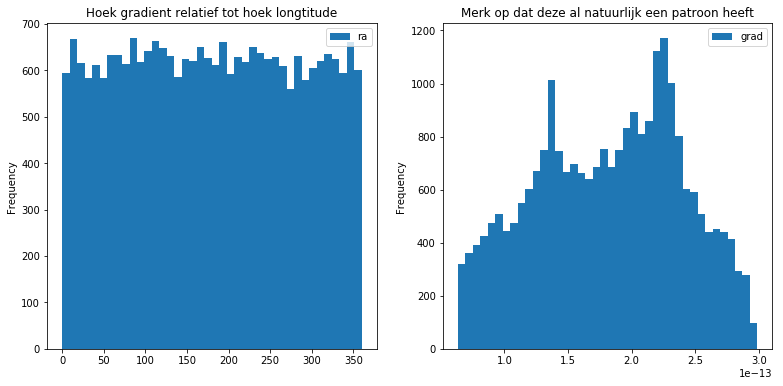

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13,6))

data[data.mag>5].plot.hist(y='ra', bins=40, ax=ax[0], title="Hoek gradient relatief tot hoek longtitude")
data[data.mag>5].plot.hist(y='grad', bins=40, ax=ax[1], title="Merk op dat deze al natuurlijk een patroon heeft")

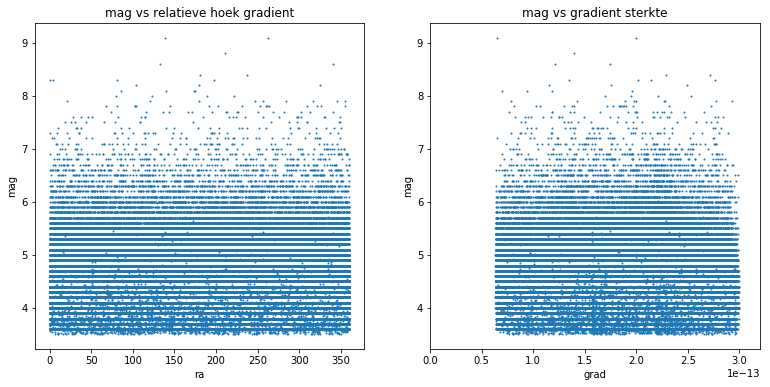

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13,6))

data.plot.scatter(x='ra', y='mag', s=1, ax=ax[0], title="mag vs relatieve hoek gradient")
data.plot.scatter(x='grad', y='mag', s=1, xlim=(0,3.2e-13), ax=ax[1], title="mag vs gradient sterkte")

fig, ax = plt.subplots(figsize=(13,6))
plt.hist2d(data.grad, data.mag, bins=20)
None

In [ ]:
data.plot.scatter(x='ra', y='grad', ylim=(0,3.1e-13), s=1)